In [105]:
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.gofplots import qqplot

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.stats.multitest import multipletests
from scipy.stats import mannwhitneyu

pd.set_option('display.max_colwidth', 1000)

In [2]:
s_race = pd.read_csv("s_race.csv")

In [3]:
s_race.head()

,Race,Method of Suicide,Year,Deaths
0,American Indian or Alaska Native,"Intentional self-poisoning by and exposure to nonopioid analgesics, antipyretics and antirheumatics",1999,2.0
1,American Indian or Alaska Native,"Intentional self-poisoning by and exposure to nonopioid analgesics, antipyretics and antirheumatics",2000,3.0
2,American Indian or Alaska Native,"Intentional self-poisoning by and exposure to nonopioid analgesics, antipyretics and antirheumatics",2001,1.0
3,American Indian or Alaska Native,"Intentional self-poisoning by and exposure to nonopioid analgesics, antipyretics and antirheumatics",2002,2.0
4,American Indian or Alaska Native,"Intentional self-poisoning by and exposure to nonopioid analgesics, antipyretics and antirheumatics",2003,4.0


In [4]:
poison_filter = s_race['Method of Suicide'].str.contains('poisoning') 
s_race.loc[poison_filter, 'Method of Suicide'] = 'Poisoning'

In [5]:
discharge_filter = s_race['Method of Suicide'].str.contains('discharge') 
s_race.loc[discharge_filter, 'Method of Suicide'] = 'Firearm'

In [6]:
means_filter = s_race['Method of Suicide'].str.contains('means') 
s_race.loc[means_filter, 'Method of Suicide'] = 'unknown or other means'

In [7]:
temp_race = s_race.groupby(['Race', 'Method of Suicide','Year']).sum()

In [8]:
temp_race = temp_race.reset_index()

In [9]:
temp_race['Method of Suicide'] = temp_race['Method of Suicide'].str.replace('Intentional self-harm by ', '')

In [10]:
temp_race.head(50)

,Race,Method of Suicide,Year,Deaths
0,American Indian or Alaska Native,Firearm,1999,135.0
1,American Indian or Alaska Native,Firearm,2000,132.0
2,American Indian or Alaska Native,Firearm,2001,130.0
3,American Indian or Alaska Native,Firearm,2002,145.0
4,American Indian or Alaska Native,Firearm,2003,126.0
5,American Indian or Alaska Native,Firearm,2004,150.0
6,American Indian or Alaska Native,Firearm,2005,161.0
7,American Indian or Alaska Native,Firearm,2006,152.0
8,American Indian or Alaska Native,Firearm,2007,134.0
9,American Indian or Alaska Native,Firearm,2008,152.0


In [11]:
total_race = s_race.groupby(['Race', 'Year']).sum()

In [12]:
 total_race = total_race.rename(columns={'Deaths': 'Total Deaths'})

In [13]:
 total_race = total_race.reset_index()

In [14]:
total_race.head(50)

,Race,Year,Total Deaths
0,American Indian or Alaska Native,1999,289.0
1,American Indian or Alaska Native,2000,289.0
2,American Indian or Alaska Native,2001,308.0
3,American Indian or Alaska Native,2002,318.0
4,American Indian or Alaska Native,2003,315.0
5,American Indian or Alaska Native,2004,392.0
6,American Indian or Alaska Native,2005,377.0
7,American Indian or Alaska Native,2006,381.0
8,American Indian or Alaska Native,2007,383.0
9,American Indian or Alaska Native,2008,393.0


In [15]:
temp_race.to_csv("temp_race.csv", index=False)

In [16]:
total_race.to_csv("total_race.csv", index=False)

In [17]:
s_tot_race = pd.read_csv("s_tot_race.csv")

In [18]:
s_tot_race['Percentile'] = s_tot_race['Deaths']/s_tot_race['Total Deaths'] * 100

In [19]:
s_tot_race = pd.DataFrame.drop(s_tot_race, axis=1, columns=["Deaths", "Total Deaths"])

In [20]:
s_tot_race.head(20)

,Race,Method of Suicide,Year,Percentile
0,American Indian or Alaska Native,Firearm,1999,46.712803
1,American Indian or Alaska Native,crashing of motor vehicle,1999,0.346021
2,American Indian or Alaska Native,drowning and submersion,1999,0.692042
3,American Indian or Alaska Native,"hanging, strangulation and suffocation",1999,36.332180
4,American Indian or Alaska Native,jumping or lying before moving object,1999,0.692042
5,American Indian or Alaska Native,sharp object,1999,1.384083
6,American Indian or Alaska Native,"smoke, fire and flames",1999,0.346021
7,American Indian or Alaska Native,Poisoning,1999,12.110727
8,American Indian or Alaska Native,unknown or other means,1999,1.384083
9,Asian or Pacific Islander,Firearm,1999,30.769231


In [21]:
s_tot_overall = pd.DataFrame.drop(s_tot_race, axis=1, columns=["Race"])
highest_overall = s_tot_overall.groupby([ 'Method of Suicide']).mean()
highest_overall.sort_values(by=['Percentile'], inplace=True, ascending=False )
highest_overall.head(3)

,Year,Percentile
Method of Suicide,,
Firearm,2008.5,42.158877
"hanging, strangulation and suffocation",2008.5,33.648526
Poisoning,2008.5,13.428209


In [22]:
suicide_race = s_tot_race.pivot_table(values='Percentile', index='Race', columns='Method of Suicide', aggfunc=sum
)

In [23]:
suicide_race = suicide_race.fillna(0)

In [24]:
suicide_race.head()

Method of Suicide,Firearm,Poisoning,blunt object,crashing of motor vehicle,drowning and submersion,explosive material,"hanging, strangulation and suffocation",jumping from a high place,jumping or lying before moving object,sharp object,"smoke, fire and flames","steam, hot vapours and hot objects",unknown or other means
Race,,,,,,,,,,,,,
American Indian or Alaska Native,799.326206,246.420738,0.000000,6.268227,10.023990,0.220264,834.066904,22.190075,29.221623,30.056561,8.919782,0.000000,13.285630
Asian or Pacific Islander,482.299812,257.486547,0.477480,9.229974,53.520228,0.348466,910.115465,138.201115,36.404056,63.047419,26.069502,0.000000,22.799936
Black or African American,1028.259399,225.211482,0.157536,7.826486,56.229157,0.132444,498.933912,71.748780,40.129616,31.154403,20.862328,0.040766,19.313690
White,1062.824770,345.137923,0.056426,7.196517,18.507074,0.320052,448.765814,40.218162,19.840597,34.716509,8.032842,0.016987,14.366327


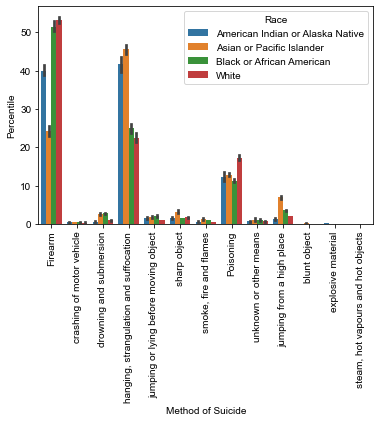

In [25]:
sns.barplot(x='Method of Suicide', y='Percentile', hue='Race', data=s_tot_race)
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(20,10)})

In [26]:
s_percent_race = pd.DataFrame.drop(s_tot_race, axis=1, columns=["Year"])

In [27]:
s_percent_race.head()

,Race,Method of Suicide,Percentile
0,American Indian or Alaska Native,Firearm,46.712803
1,American Indian or Alaska Native,crashing of motor vehicle,0.346021
2,American Indian or Alaska Native,drowning and submersion,0.692042
3,American Indian or Alaska Native,"hanging, strangulation and suffocation",36.332180
4,American Indian or Alaska Native,jumping or lying before moving object,0.692042


In [28]:
native_filter = s_percent_race['Race'].str.contains('Native') 
s_percent_native =s_percent_race.loc[native_filter]

highest_race_native = s_percent_native.rename(columns={'Method of Suicide': 'Method of Suicide for Native'})

highest_race_native = highest_race_native.groupby([ 'Method of Suicide for Native']).mean()
highest_race_native.sort_values(by=['Percentile'], inplace=True, ascending=False )

highest_race_native.head()

,Percentile
Method of Suicide for Native,
"hanging, strangulation and suffocation",41.703345
Firearm,39.966310
Poisoning,12.321037
sharp object,1.502828
jumping or lying before moving object,1.461081


In [29]:
white_filter = s_percent_race['Race'].str.contains('White') 
s_percent_white =s_percent_race.loc[white_filter]

highest_race_white = s_percent_white.rename(columns={'Method of Suicide': 'Method of Suicide for white'})

highest_race_white = highest_race_white.groupby([ 'Method of Suicide for white']).mean()


highest_race_white.sort_values(by=['Percentile'], inplace=True, ascending=False )
highest_race_white.head()

,Percentile
Method of Suicide for white,
Firearm,53.141238
"hanging, strangulation and suffocation",22.438291
Poisoning,17.256896
jumping from a high place,2.010908
sharp object,1.735825


In [30]:
black_filter = s_percent_race['Race'].str.contains('Black') 
s_percent_black =s_percent_race.loc[black_filter]

highest_race_black = s_percent_black.rename(columns={'Method of Suicide': 'Method of Suicide for black'})

highest_race_black = highest_race_black.groupby([ 'Method of Suicide for black']).mean()

highest_race_black.sort_values(by=['Percentile'], inplace=True, ascending=False )
highest_race_black.head()

,Percentile
Method of Suicide for black,
Firearm,51.412970
"hanging, strangulation and suffocation",24.946696
Poisoning,11.260574
jumping from a high place,3.587439
drowning and submersion,2.811458


In [31]:
asian_filter = s_percent_race['Race'].str.contains('Asian') 
s_percent_asian =s_percent_race.loc[asian_filter]

highest_race_asian = s_percent_asian.rename(columns={'Method of Suicide': 'Method of Suicide for asian'})

highest_race_asian = highest_race_asian.groupby([ 'Method of Suicide for asian']).mean()
highest_race_asian.sort_values(by=['Percentile'], inplace=True, ascending=False )
highest_race_asian.head()

,Percentile
Method of Suicide for asian,
"hanging, strangulation and suffocation",45.505773
Firearm,24.114991
Poisoning,12.874327
jumping from a high place,6.910056
sharp object,3.152371


In [32]:


firearm_filter = s_percent_race['Method of Suicide'].str.contains('Firearm') 
s_percent_race_firearm =s_percent_race.loc[firearm_filter]

In [33]:
s_percent_race_firearm

,Race,Method of Suicide,Percentile
0,American Indian or Alaska Native,Firearm,46.712803
9,Asian or Pacific Islander,Firearm,30.769231
18,Black or African American,Firearm,58.394161
28,White,Firearm,57.688766
40,American Indian or Alaska Native,Firearm,45.674740
...,...,...,...
780,White,Firearm,51.950991
792,American Indian or Alaska Native,Firearm,36.150235
802,Asian or Pacific Islander,Firearm,24.124256
812,Black or African American,Firearm,48.735777


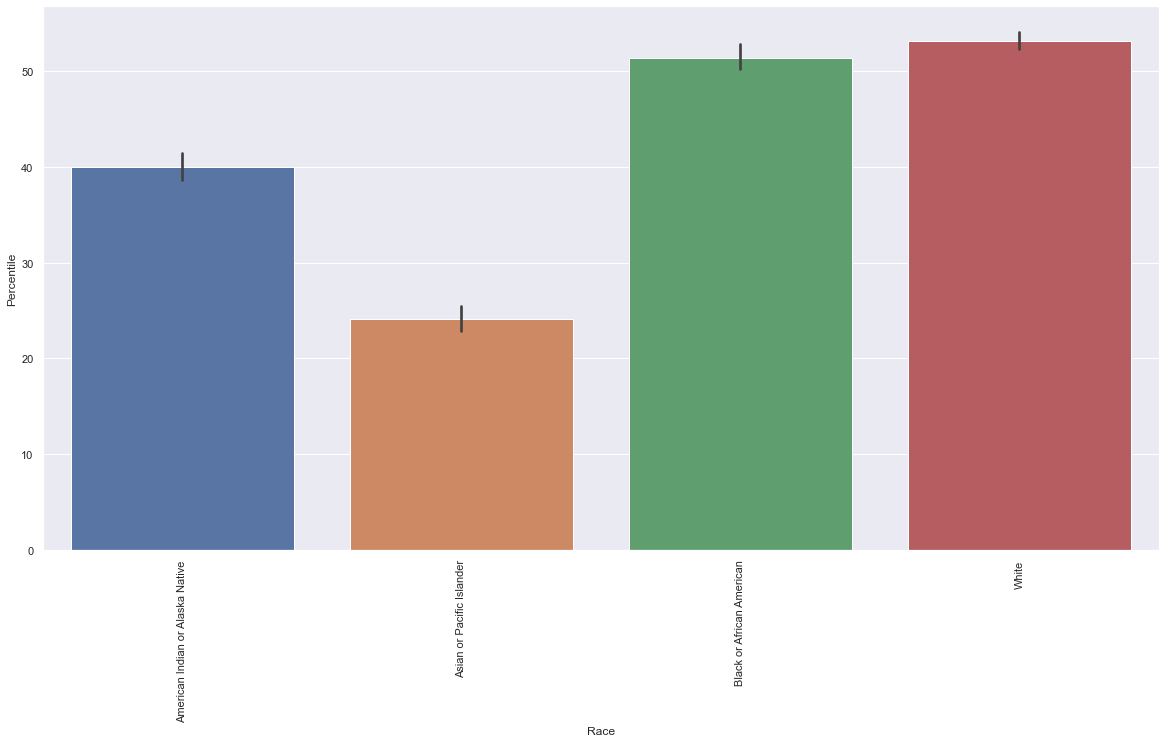

In [34]:
sns.barplot(x='Race', y='Percentile',  data=s_percent_race_firearm)
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(20,10)})

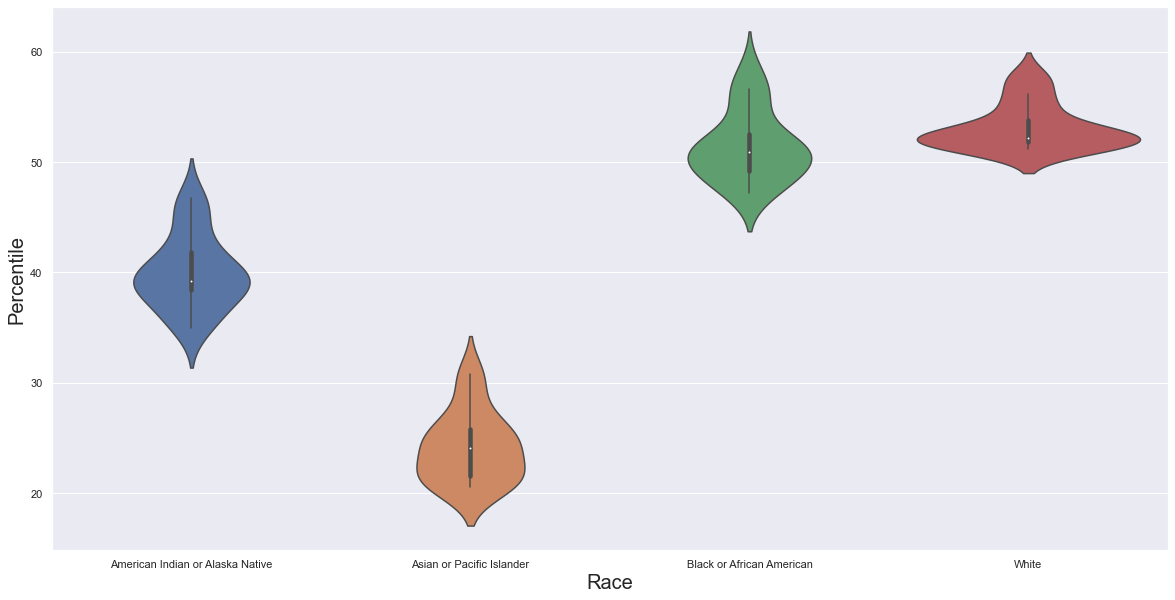

In [35]:
plt.rcParams["axes.labelsize"] = 20
sns.violinplot(x='Race', y='Percentile',  data=s_percent_race_firearm)

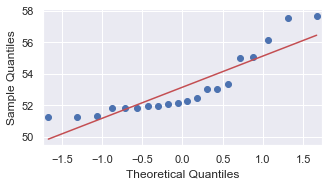

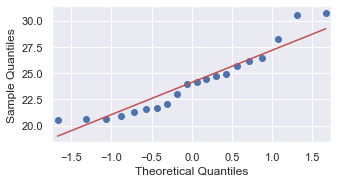

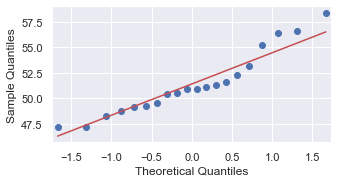

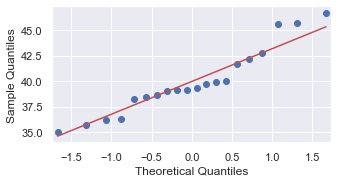

In [73]:
sns.set(rc={'figure.figsize':(5,2.5)})
qqplot(s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "White", "Percentile"], line="s")
plt.show()

qqplot(s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "Asian or Pacific Islander", "Percentile"], line="s")
plt.show()

qqplot(s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "Black or African American", "Percentile"], line="s")
plt.show()

qqplot(s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "American Indian or Alaska Native", "Percentile"], line="s")
plt.show()

In [53]:
_, p = stats.shapiro(s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "White", "Percentile"])
p

0.0010345533955842257

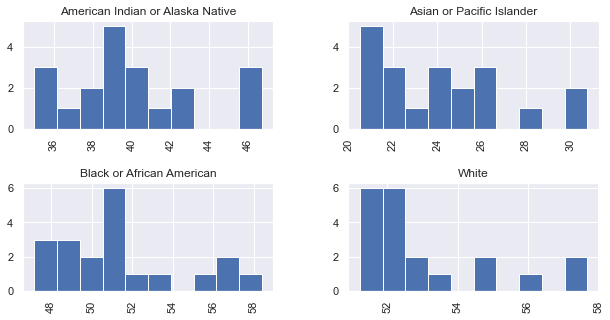

In [103]:
sns.set(rc={'figure.figsize':(10,5)})
s_percent_race_firearm['Percentile'].hist(by=s_percent_race_firearm['Race'])
plt.show()

In [87]:
lm = ols("Percentile ~ C(Race)", data=s_percent_race_firearm).fit()
anova_table = sm.stats.anova_lm(lm, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Race),10732.793712,3.0,412.655753,6.290758e-47
Residual,658.896523,76.0,NaN,NaN


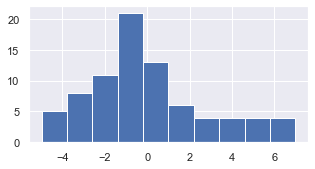

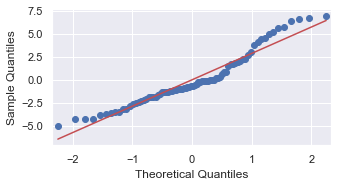

In [88]:

plt.hist(lm.resid)
plt.show()

qqplot(lm.resid, line="s")
plt.show()

In [93]:
_, p = stats.shapiro(lm.resid)
print( "p value is: ")
print(p)  
print("Not Normal")

p value is: 
0.0006160946213640273
Not Normal


In [50]:
_, p = stats.f_oneway(
    s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "White", "Percentile"],
    s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "Asian or Pacific Islander", "Percentile"],
    s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "Black or African American", "Percentile"],
    s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "American Indian or Alaska Native", "Percentile"],
)
p

6.290758459615985e-47

In [90]:

test_statistic, p_value = stats.kruskal(
       s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "White", "Percentile"],
    s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "Asian or Pacific Islander", "Percentile"],
    s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "Black or African American", "Percentile"],
    s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "American Indian or Alaska Native", "Percentile"]
)
print(f'p value < 0.05? {p_value < 0.05} (p = {p_value:.4f})')

p value < 0.05? True (p = 0.0000)


In [117]:
stat, p1 = stats.mannwhitneyu(s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "White", "Percentile"],s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "Asian or Pacific Islander", "Percentile"])
alpha = 0.0000000156
print('p for White compared to Asian or Pacific Islander is: ')
print(p1)
if p1 > alpha:
    print('Same distribution (fail to reject H0)')
    print('  ')
else:
    print('Different distribution (reject H0)')
    print('  ')
    
stat, p2 = stats.mannwhitneyu(s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "White", "Percentile"], s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "Black or African American", "Percentile"])
print('p for White compared to Black or African American is: ')
print(p2)
if p2 > alpha:
    print('Same distribution (fail to reject H0)')
    print('  ')
else:
    print('Different distribution (reject H0)')
    print('  ')
    
stat, p3 = stats.mannwhitneyu(s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "White", "Percentile"], s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "American Indian or Alaska Native", "Percentile"])
print('p for White compared to American Indian or Alaska Native is: ')
print(p3)
if p3 > alpha:
    print('Same distribution (fail to reject H0)')
    print('  ')
else:
    print('Different distribution (reject H0)')
    print('  ')
    
stat, p4 = stats.mannwhitneyu(s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "Asian or Pacific Islander", "Percentile"], s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "Black or African American", "Percentile"])
print('p for Asian or Pacific Islander compared to Black or African American is: ')
print(p4)
if p4 > alpha:
    print('Same distribution (fail to reject H0)')
    print('  ')
else:
    print('Different distribution (reject H0)')
    print('  ')
    
stat, p5 = stats.mannwhitneyu(s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "Asian or Pacific Islander", "Percentile"], s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "American Indian or Alaska Native", "Percentile"])
print('p for Asian or Pacific Islander compared to American Indian or Alaska Native is: ')
print(p5)
if p5 > alpha:
    print('Same distribution (fail to reject H0)')
    print('  ')
else:
    print('Different distribution (reject H0)')
    print('  ')
    
stat, p6 = stats.mannwhitneyu(s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "Black or African American", "Percentile"], s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "American Indian or Alaska Native", "Percentile"])
print('p for Black or African American compared to American Indian or Alaska Native is: ')
print(p6)
if p6 > alpha:
    print('Same distribution (fail to reject H0)')
    print('  ')
else:
    print('Different distribution (reject H0)')
   

p for White compared to Asian or Pacific Islander is: 
3.397807564086679e-08
Same distribution (fail to reject H0)
  
p for White compared to Black or African American is: 
0.004893243363538507
Same distribution (fail to reject H0)
  
p for White compared to American Indian or Alaska Native is: 
3.397807564086679e-08
Same distribution (fail to reject H0)
  
p for Asian or Pacific Islander compared to Black or African American is: 
3.397807564086679e-08
Same distribution (fail to reject H0)
  
p for Asian or Pacific Islander compared to American Indian or Alaska Native is: 
3.397807564086679e-08
Same distribution (fail to reject H0)
  
p for Black or African American compared to American Indian or Alaska Native is: 
3.397807564086679e-08
Same distribution (fail to reject H0)
  


In [115]:
stat, p1 = stats.mannwhitneyu(s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "White", "Percentile"],s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "Asian or Pacific Islander", "Percentile"])
alpha = 0.05
print('p for White compared to Asian or Pacific Islander is: ')
print(p1)
if p1 > alpha:
    print('Same distribution (fail to reject H0)')
    print('  ')
else:
    print('Different distribution (reject H0)')
    print('  ')
    
stat, p2 = stats.mannwhitneyu(s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "White", "Percentile"], s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "Black or African American", "Percentile"])
print('p for White compared to Black or African American is: ')
print(p2)
if p2 > alpha:
    print('Same distribution (fail to reject H0)')
    print('  ')
else:
    print('Different distribution (reject H0)')
    print('  ')
    
stat, p3 = stats.mannwhitneyu(s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "White", "Percentile"], s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "American Indian or Alaska Native", "Percentile"])
print('p for White compared to American Indian or Alaska Native is: ')
print(p3)
if p3 > alpha:
    print('Same distribution (fail to reject H0)')
    print('  ')
else:
    print('Different distribution (reject H0)')
    print('  ')
    
stat, p4 = stats.mannwhitneyu(s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "Asian or Pacific Islander", "Percentile"], s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "Black or African American", "Percentile"])
print('p for Asian or Pacific Islander compared to Black or African American is: ')
print(p4)
if p4 > alpha:
    print('Same distribution (fail to reject H0)')
    print('  ')
else:
    print('Different distribution (reject H0)')
    print('  ')
    
stat, p5 = stats.mannwhitneyu(s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "Asian or Pacific Islander", "Percentile"], s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "American Indian or Alaska Native", "Percentile"])
print('p for Asian or Pacific Islander compared to American Indian or Alaska Native is: ')
print(p5)
if p5 > alpha:
    print('Same distribution (fail to reject H0)')
    print('  ')
else:
    print('Different distribution (reject H0)')
    print('  ')
    
stat, p6 = stats.mannwhitneyu(s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "Black or African American", "Percentile"], s_percent_race_firearm.loc[s_percent_race_firearm["Race"]== "American Indian or Alaska Native", "Percentile"])
print('p for Black or African American compared to American Indian or Alaska Native is: ')
print(p6)
if p6 > alpha:
    print('Same distribution (fail to reject H0)')
    print('  ')
else:
    print('Different distribution (reject H0)')
    print('  ')

p for White compared to Asian or Pacific Islander is: 
3.397807564086679e-08
Different distribution (reject H0)
  
p for White compared to Black or African American is: 
0.004893243363538507
Different distribution (reject H0)
  
p for White compared to American Indian or Alaska Native is: 
3.397807564086679e-08
Different distribution (reject H0)
  
p for Asian or Pacific Islander compared to Black or African American is: 
3.397807564086679e-08
Different distribution (reject H0)
  
p for Asian or Pacific Islander compared to American Indian or Alaska Native is: 
3.397807564086679e-08
Different distribution (reject H0)
  
p for Black or African American compared to American Indian or Alaska Native is: 
3.397807564086679e-08
Different distribution (reject H0)
  


In [ ]:
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

group1,group2,meandiff,p-adj,lower,upper,reject
American Indian or Alaska Native,Asian or Pacific Islander,-15.8513,0.001,-18.2972,-13.4054,True
American Indian or Alaska Native,Black or African American,11.4467,0.001,9.0007,13.8926,True
American Indian or Alaska Native,White,13.1749,0.001,10.729,15.6209,True
Asian or Pacific Islander,Black or African American,27.298,0.001,24.8521,29.7439,True
Asian or Pacific Islander,White,29.0262,0.001,26.5803,31.4722,True
Black or African American,White,1.7283,0.2558,-0.7177,4.1742,False


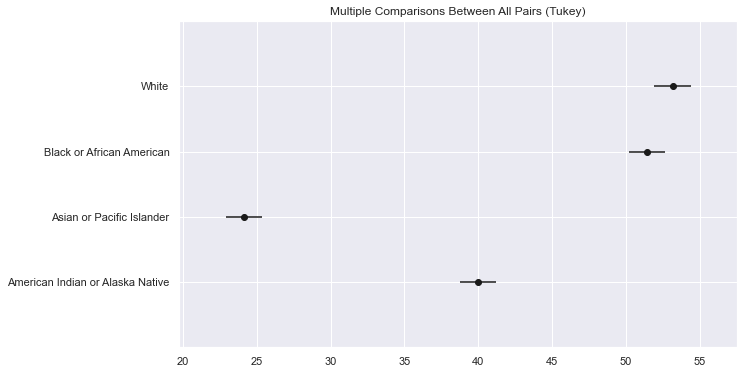

In [36]:
tukey_results = pairwise_tukeyhsd(
    endog=s_percent_race_firearm["Percentile"], groups=s_percent_race_firearm["Race"], alpha=0.05
)

display(tukey_results.summary())

tukey_results.plot_simultaneous()
plt.show()

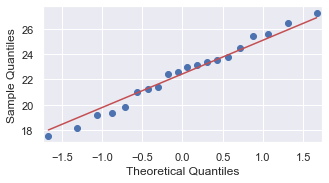

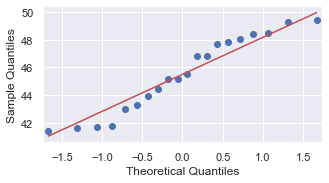

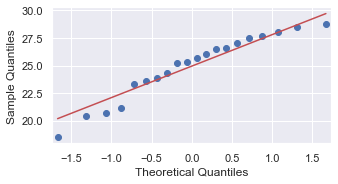

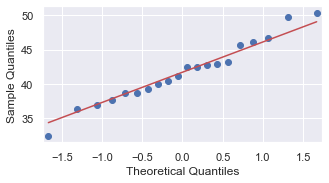

In [74]:
sns.set(rc={'figure.figsize':(5,2.5)})
qqplot(s_percent_race_hanging.loc[s_percent_race_hanging["Race"]== "White", "Percentile"], line="s")
plt.show()

qqplot(s_percent_race_hanging.loc[s_percent_race_hanging["Race"]== "Asian or Pacific Islander", "Percentile"], line="s")
plt.show()

qqplot(s_percent_race_hanging.loc[s_percent_race_hanging["Race"]== "Black or African American", "Percentile"], line="s")
plt.show()

qqplot(s_percent_race_hanging.loc[s_percent_race_hanging["Race"]== "American Indian or Alaska Native", "Percentile"], line="s")
plt.show()

In [37]:
hanging_filter = s_percent_race['Method of Suicide'].str.contains('hanging') 
s_percent_race_hanging =s_percent_race.loc[hanging_filter]
s_percent_race_hanging.head()

,Race,Method of Suicide,Percentile
3,American Indian or Alaska Native,"hanging, strangulation and suffocation",36.332180
11,Asian or Pacific Islander,"hanging, strangulation and suffocation",41.384615
21,Black or African American,"hanging, strangulation and suffocation",18.508863
33,White,"hanging, strangulation and suffocation",17.522253
42,American Indian or Alaska Native,"hanging, strangulation and suffocation",37.716263


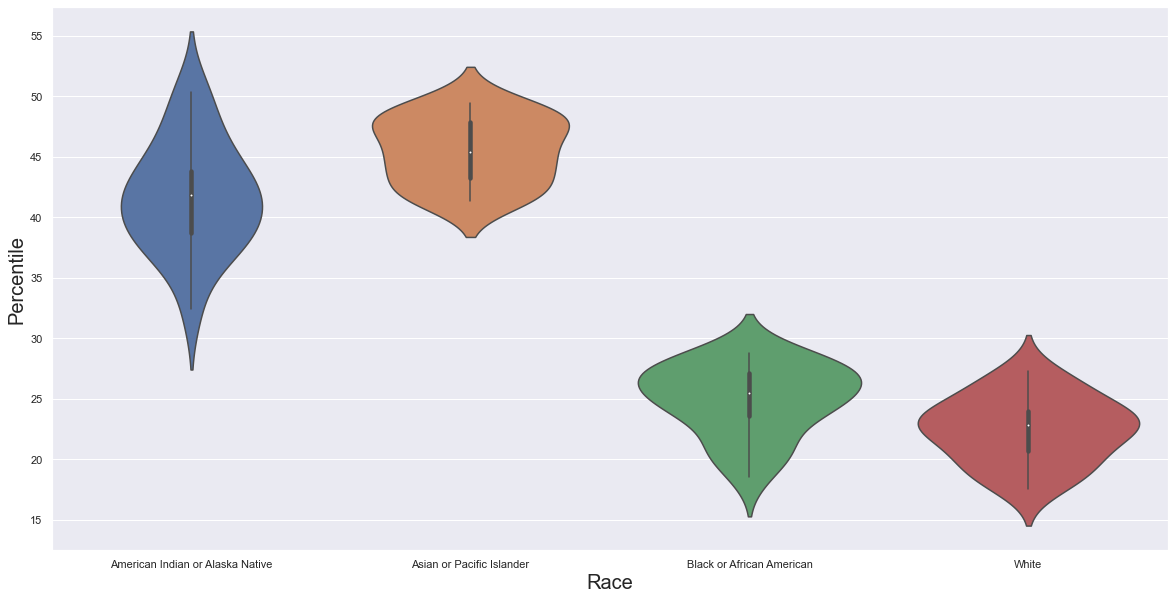

In [38]:

sns.violinplot(x='Race', y='Percentile',  data=s_percent_race_hanging)

group1,group2,meandiff,p-adj,lower,upper,reject
American Indian or Alaska Native,Asian or Pacific Islander,3.8024,0.0028,1.0487,6.5562,True
American Indian or Alaska Native,Black or African American,-16.7566,0.001,-19.5104,-14.0029,True
American Indian or Alaska Native,White,-19.2651,0.001,-22.0188,-16.5113,True
Asian or Pacific Islander,Black or African American,-20.5591,0.001,-23.3128,-17.8053,True
Asian or Pacific Islander,White,-23.0675,0.001,-25.8212,-20.3137,True
Black or African American,White,-2.5084,0.0872,-5.2622,0.2454,False


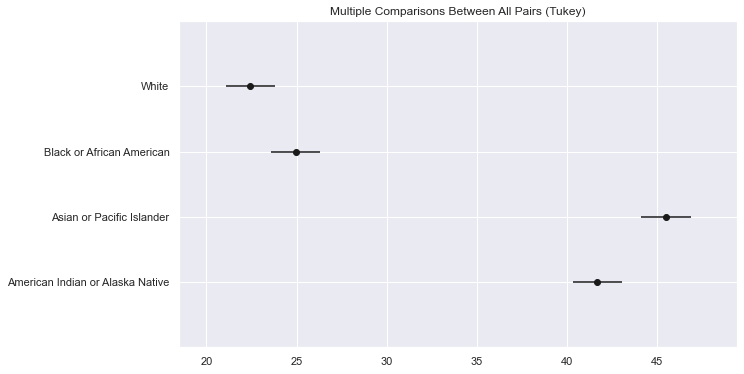

In [39]:
tukey_results_hanging = pairwise_tukeyhsd(
    endog=s_percent_race_hanging["Percentile"], groups=s_percent_race_hanging["Race"], alpha=0.05
)

display(tukey_results_hanging.summary())

tukey_results_hanging.plot_simultaneous()
plt.show()

In [78]:
lm = ols("Percentile ~ C(Race)", data=s_percent_race_hanging).fit()
anova_table = sm.stats.anova_lm(lm, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Race),8137.313038,3.0,246.824696,4.395969e-39
Residual,835.188972,76.0,NaN,NaN


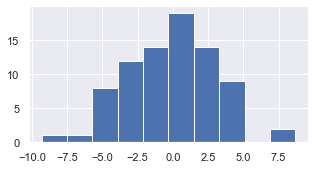

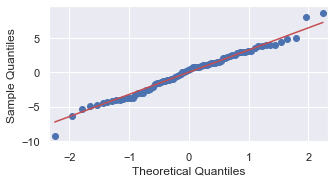

In [79]:
sns.set(rc={'figure.figsize':(5,2.5)})
plt.hist(lm.resid)
plt.show()

qqplot(lm.resid, line="s")
plt.show()

In [83]:
_, p = stats.shapiro(lm.resid)

print( "p value is: ")
print(p)      

p value is: 
0.7096408009529114


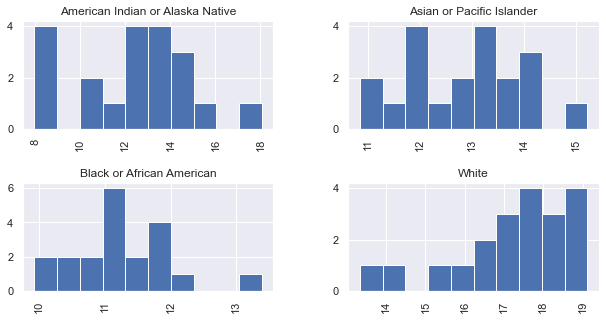

In [104]:
sns.set(rc={'figure.figsize':(10,5)})
s_percent_race_poison['Percentile'].hist(by=s_percent_race_poison['Race'])
plt.show()

In [40]:
poison_filter = s_percent_race['Method of Suicide'].str.contains('Poisoning') 
s_percent_race_poison =s_percent_race.loc[poison_filter]
s_percent_race_poison.head()

,Race,Method of Suicide,Percentile
7,American Indian or Alaska Native,Poisoning,12.110727
16,Asian or Pacific Islander,Poisoning,11.076923
26,Black or African American,Poisoning,10.010428
38,White,Poisoning,17.598987
47,American Indian or Alaska Native,Poisoning,10.380623


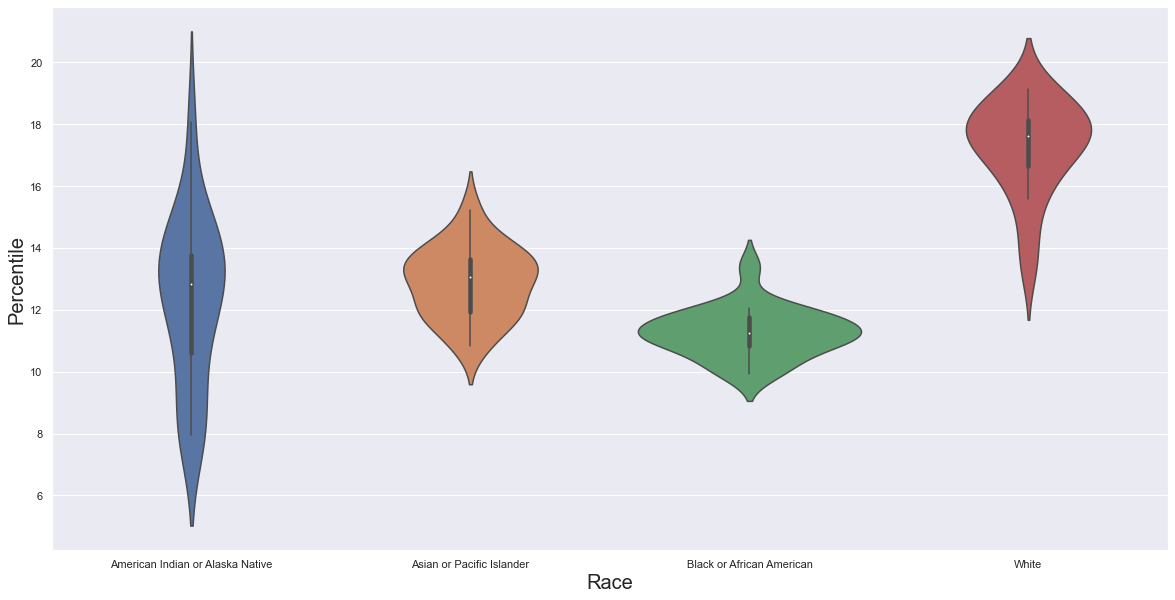

In [41]:
sns.violinplot(x='Race', y='Percentile',  data=s_percent_race_poison)

group1,group2,meandiff,p-adj,lower,upper,reject
American Indian or Alaska Native,Asian or Pacific Islander,0.5533,0.7024,-0.8431,1.9497,False
American Indian or Alaska Native,Black or African American,-1.0605,0.199,-2.4568,0.3359,False
American Indian or Alaska Native,White,4.9359,0.001,3.5395,6.3322,True
Asian or Pacific Islander,Black or African American,-1.6138,0.017,-3.0101,-0.2174,True
Asian or Pacific Islander,White,4.3826,0.001,2.9862,5.7789,True
Black or African American,White,5.9963,0.001,4.6,7.3927,True


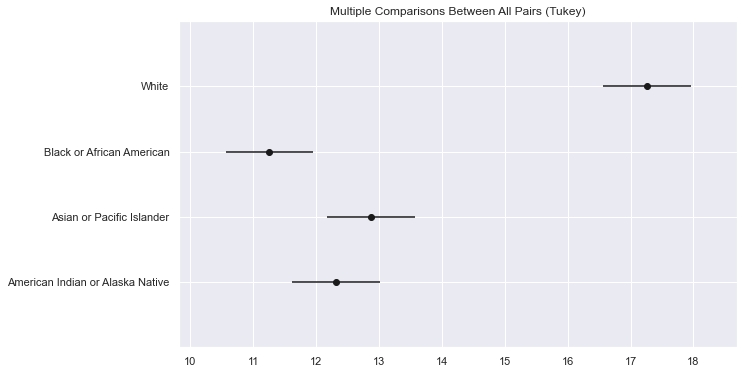

In [42]:
tukey_results_poison = pairwise_tukeyhsd(
    endog=s_percent_race_poison["Percentile"], groups=s_percent_race_poison["Race"], alpha=0.05
)

display(tukey_results_poison.summary())

tukey_results_poison.plot_simultaneous()
plt.show()

In [118]:
stat, p1 = stats.mannwhitneyu(s_percent_race_poison.loc[s_percent_race_poison["Race"]== "White", "Percentile"],s_percent_race_poison.loc[s_percent_race_poison["Race"]== "Asian or Pacific Islander", "Percentile"])
alpha = 0.05
print('p for White compared to Asian or Pacific Islander is: ')
print(p1)
if p1 > alpha:
    print('Same distribution (fail to reject H0)')
    print('  ')
else:
    print('Different distribution (reject H0)')
    print('  ')
    
stat, p2 = stats.mannwhitneyu(s_percent_race_poison.loc[s_percent_race_poison["Race"]== "White", "Percentile"], s_percent_race_poison.loc[s_percent_race_poison["Race"]== "Black or African American", "Percentile"])
print('p for White compared to Black or African American is: ')
print(p2)
if p2 > alpha:
    print('Same distribution (fail to reject H0)')
    print('  ')
else:
    print('Different distribution (reject H0)')
    print('  ')
    
stat, p3 = stats.mannwhitneyu(s_percent_race_poison.loc[s_percent_race_poison["Race"]== "White", "Percentile"], s_percent_race_poison.loc[s_percent_race_poison["Race"]== "American Indian or Alaska Native", "Percentile"])
print('p for White compared to American Indian or Alaska Native is: ')
print(p3)
if p3 > alpha:
    print('Same distribution (fail to reject H0)')
    print('  ')
else:
    print('Different distribution (reject H0)')
    print('  ')
    
stat, p4 = stats.mannwhitneyu(s_percent_race_poison.loc[s_percent_race_poison["Race"]== "Asian or Pacific Islander", "Percentile"], s_percent_race_poison.loc[s_percent_race_poison["Race"]== "Black or African American", "Percentile"])
print('p for Asian or Pacific Islander compared to Black or African American is: ')
print(p4)
if p4 > alpha:
    print('Same distribution (fail to reject H0)')
    print('  ')
else:
    print('Different distribution (reject H0)')
    print('  ')
    
stat, p5 = stats.mannwhitneyu(s_percent_race_poison.loc[s_percent_race_poison["Race"]== "Asian or Pacific Islander", "Percentile"], s_percent_race_poison.loc[s_percent_race_poison["Race"]== "American Indian or Alaska Native", "Percentile"])
print('p for Asian or Pacific Islander compared to American Indian or Alaska Native is: ')
print(p5)
if p5 > alpha:
    print('Same distribution (fail to reject H0)')
    print('  ')
else:
    print('Different distribution (reject H0)')
    print('  ')
    
stat, p6 = stats.mannwhitneyu(s_percent_race_poison.loc[s_percent_race_poison["Race"]== "Black or African American", "Percentile"], s_percent_race_poison.loc[s_percent_race_poison["Race"]== "American Indian or Alaska Native", "Percentile"])
print('p for Black or African American compared to American Indian or Alaska Native is: ')
print(p6)
if p6 > alpha:
    print('Same distribution (fail to reject H0)')
    print('  ')
else:
    print('Different distribution (reject H0)')
    print('  ')

p for White compared to Asian or Pacific Islander is: 
1.1088821650461217e-07
Different distribution (reject H0)
  
p for White compared to Black or African American is: 
3.9490168333373314e-08
Different distribution (reject H0)
  
p for White compared to American Indian or Alaska Native is: 
1.177829568115366e-06
Different distribution (reject H0)
  
p for Asian or Pacific Islander compared to Black or African American is: 
2.9479586089607507e-05
Different distribution (reject H0)
  
p for Asian or Pacific Islander compared to American Indian or Alaska Native is: 
0.34744550993388323
Same distribution (fail to reject H0)
  
p for Black or African American compared to American Indian or Alaska Native is: 
0.01802416333209157
Different distribution (reject H0)
  


In [119]:
stat, p1 = stats.mannwhitneyu(s_percent_race_poison.loc[s_percent_race_poison["Race"]== "White", "Percentile"],s_percent_race_poison.loc[s_percent_race_poison["Race"]== "Asian or Pacific Islander", "Percentile"])
alpha = 0.0000000156
print('p for White compared to Asian or Pacific Islander is: ')
print(p1)
if p1 > alpha:
    print('Same distribution (fail to reject H0)')
    print('  ')
else:
    print('Different distribution (reject H0)')
    print('  ')
    
stat, p2 = stats.mannwhitneyu(s_percent_race_poison.loc[s_percent_race_poison["Race"]== "White", "Percentile"], s_percent_race_poison.loc[s_percent_race_poison["Race"]== "Black or African American", "Percentile"])
print('p for White compared to Black or African American is: ')
print(p2)
if p2 > alpha:
    print('Same distribution (fail to reject H0)')
    print('  ')
else:
    print('Different distribution (reject H0)')
    print('  ')
    
stat, p3 = stats.mannwhitneyu(s_percent_race_poison.loc[s_percent_race_poison["Race"]== "White", "Percentile"], s_percent_race_poison.loc[s_percent_race_poison["Race"]== "American Indian or Alaska Native", "Percentile"])
print('p for White compared to American Indian or Alaska Native is: ')
print(p3)
if p3 > alpha:
    print('Same distribution (fail to reject H0)')
    print('  ')
else:
    print('Different distribution (reject H0)')
    print('  ')
    
stat, p4 = stats.mannwhitneyu(s_percent_race_poison.loc[s_percent_race_poison["Race"]== "Asian or Pacific Islander", "Percentile"], s_percent_race_poison.loc[s_percent_race_poison["Race"]== "Black or African American", "Percentile"])
print('p for Asian or Pacific Islander compared to Black or African American is: ')
print(p4)
if p4 > alpha:
    print('Same distribution (fail to reject H0)')
    print('  ')
else:
    print('Different distribution (reject H0)')
    print('  ')
    
stat, p5 = stats.mannwhitneyu(s_percent_race_poison.loc[s_percent_race_poison["Race"]== "Asian or Pacific Islander", "Percentile"], s_percent_race_poison.loc[s_percent_race_poison["Race"]== "American Indian or Alaska Native", "Percentile"])
print('p for Asian or Pacific Islander compared to American Indian or Alaska Native is: ')
print(p5)
if p5 > alpha:
    print('Same distribution (fail to reject H0)')
    print('  ')
else:
    print('Different distribution (reject H0)')
    print('  ')
    
stat, p6 = stats.mannwhitneyu(s_percent_race_poison.loc[s_percent_race_poison["Race"]== "Black or African American", "Percentile"], s_percent_race_poison.loc[s_percent_race_poison["Race"]== "American Indian or Alaska Native", "Percentile"])
print('p for Black or African American compared to American Indian or Alaska Native is: ')
print(p6)
if p6 > alpha:
    print('Same distribution (fail to reject H0)')
    print('  ')
else:
    print('Different distribution (reject H0)')
    print('  ')

p for White compared to Asian or Pacific Islander is: 
1.1088821650461217e-07
Same distribution (fail to reject H0)
  
p for White compared to Black or African American is: 
3.9490168333373314e-08
Same distribution (fail to reject H0)
  
p for White compared to American Indian or Alaska Native is: 
1.177829568115366e-06
Same distribution (fail to reject H0)
  
p for Asian or Pacific Islander compared to Black or African American is: 
2.9479586089607507e-05
Same distribution (fail to reject H0)
  
p for Asian or Pacific Islander compared to American Indian or Alaska Native is: 
0.34744550993388323
Same distribution (fail to reject H0)
  
p for Black or African American compared to American Indian or Alaska Native is: 
0.01802416333209157
Same distribution (fail to reject H0)
  


In [94]:
lm = ols("Percentile ~ C(Race)", data=s_percent_race_poison).fit()
anova_table = sm.stats.anova_lm(lm, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Race),417.802023,3.0,49.287287,8.531793e-18
Residual,214.747423,76.0,NaN,NaN


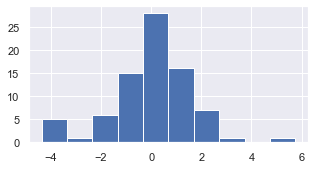

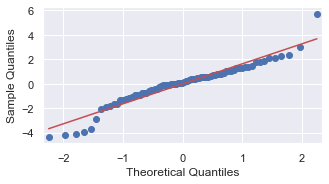

In [95]:
plt.hist(lm.resid)
plt.show()

qqplot(lm.resid, line="s")
plt.show()

In [96]:
_, p = stats.shapiro(lm.resid)
print( "p value is: ")
print(p)  
print("Not Normal") 

p value is: 
0.0011764104710891843
Not Normal


In [43]:
drowning_filter = s_percent_race['Method of Suicide'].str.contains('drowning ') 
s_percent_race_drowning  =s_percent_race.loc[drowning_filter]

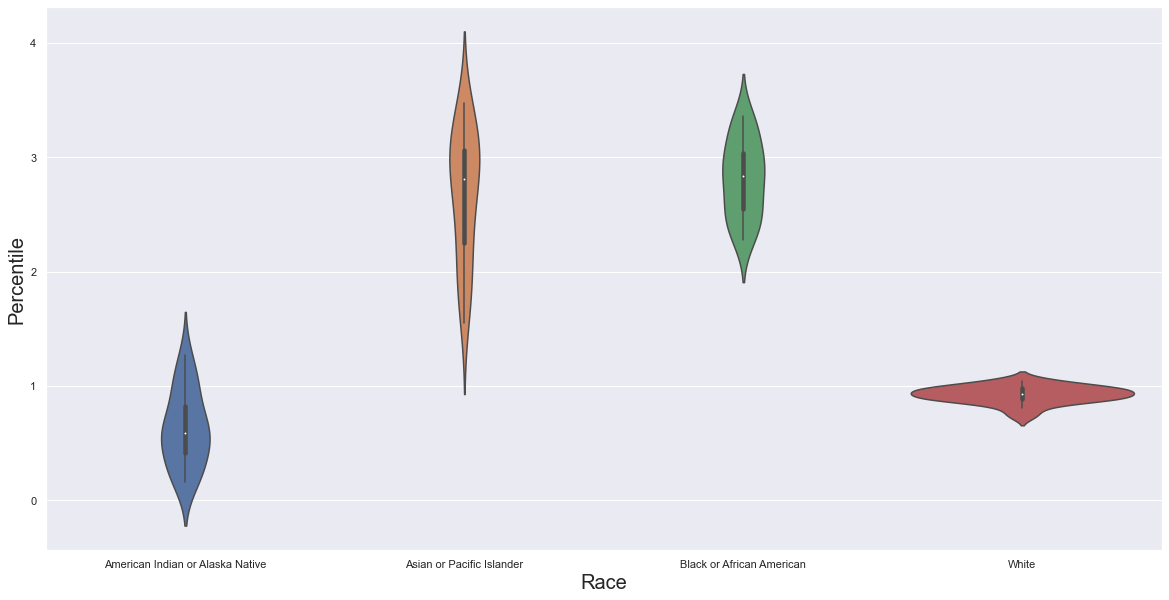

In [44]:
sns.violinplot(x='Race', y='Percentile',  data=s_percent_race_drowning)

group1,group2,meandiff,p-adj,lower,upper,reject
American Indian or Alaska Native,Asian or Pacific Islander,2.0495,0.001,1.7206,2.3785,True
American Indian or Alaska Native,Black or African American,2.185,0.001,1.856,2.5139,True
American Indian or Alaska Native,White,0.2989,0.0882,-0.0301,0.6278,False
Asian or Pacific Islander,Black or African American,0.1354,0.6426,-0.1747,0.4456,False
Asian or Pacific Islander,White,-1.7507,0.001,-2.0608,-1.4405,True
Black or African American,White,-1.8861,0.001,-2.1962,-1.576,True


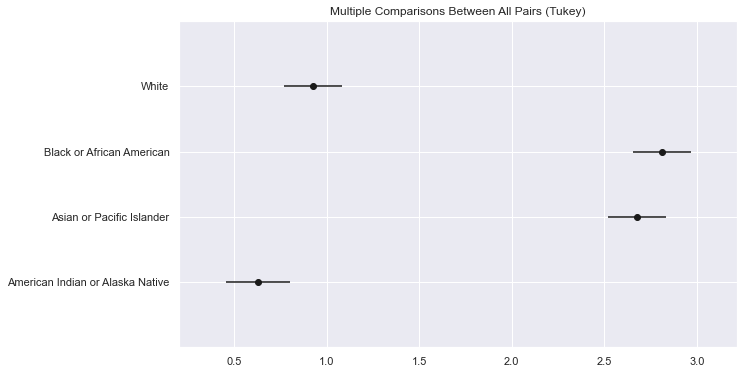

In [45]:
tukey_results_drowning  = pairwise_tukeyhsd(
    endog=s_percent_race_drowning ["Percentile"], groups=s_percent_race_drowning ["Race"], alpha=0.05
)

display(tukey_results_drowning .summary())

tukey_results_drowning .plot_simultaneous()
plt.show()

In [84]:
lm = ols("Percentile ~ C(Race)", data=s_percent_race_drowning).fit()
anova_table = sm.stats.anova_lm(lm, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Race),73.113801,3.0,175.278604,5.188535e-33
Residual,10.011098,72.0,NaN,NaN


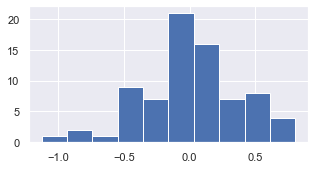

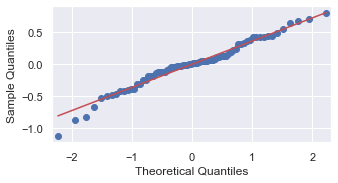

In [85]:
plt.hist(lm.resid)
plt.show()

qqplot(lm.resid, line="s")
plt.show()

In [86]:
_, p = stats.shapiro(lm.resid)
print( "p value is: ")
print(p)  

p value is: 
0.17259050905704498


In [46]:
lying_filter = s_percent_race['Method of Suicide'].str.contains('lying') 
s_percent_race_lying  =s_percent_race.loc[lying_filter]

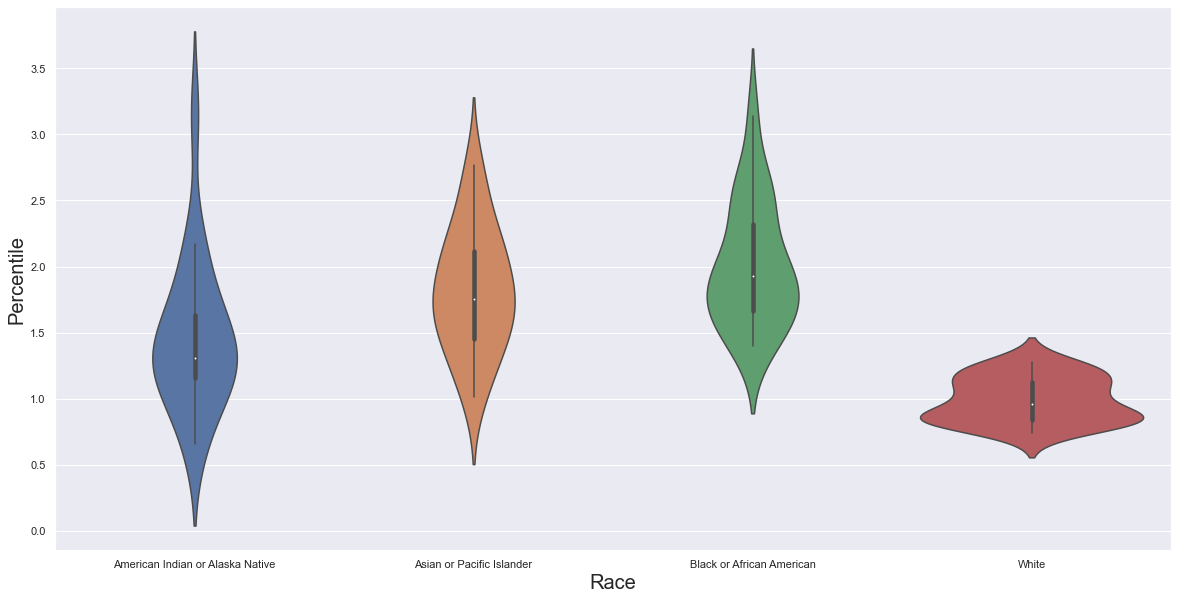

In [47]:
sns.violinplot(x='Race', y='Percentile',  data=s_percent_race_lying)

group1,group2,meandiff,p-adj,lower,upper,reject
American Indian or Alaska Native,Asian or Pacific Islander,0.3591,0.0576,-0.008,0.7263,False
American Indian or Alaska Native,Black or African American,0.5454,0.0012,0.1782,0.9126,True
American Indian or Alaska Native,White,-0.4691,0.0067,-0.8362,-0.1019,True
Asian or Pacific Islander,Black or African American,0.1863,0.5402,-0.1809,0.5534,False
Asian or Pacific Islander,White,-0.8282,0.001,-1.1953,-0.461,True
Black or African American,White,-1.0145,0.001,-1.3816,-0.6473,True


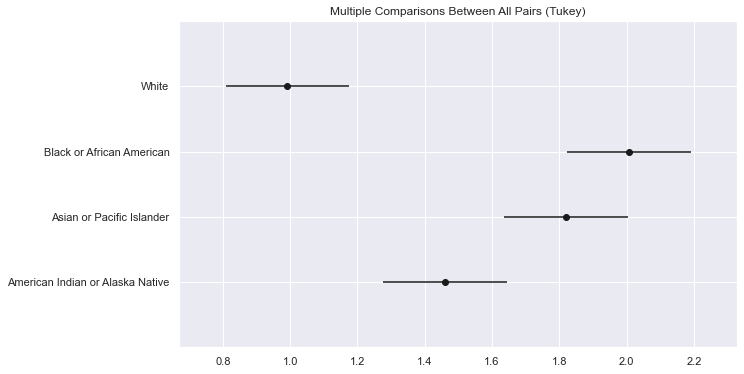

In [48]:
tukey_results_lying  = pairwise_tukeyhsd(
    endog=s_percent_race_lying ["Percentile"], groups=s_percent_race_lying ["Race"], alpha=0.05
)

display(tukey_results_lying.summary())

tukey_results_lying.plot_simultaneous()
plt.show()

In [97]:
lm = ols("Percentile ~ C(Race)", data=s_percent_race_lying).fit()
anova_table = sm.stats.anova_lm(lm, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Race),11.980595,3.0,20.442138,8.213884e-10
Residual,14.847195,76.0,NaN,NaN


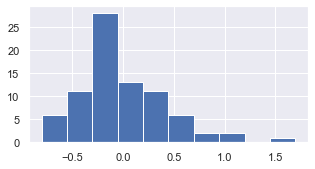

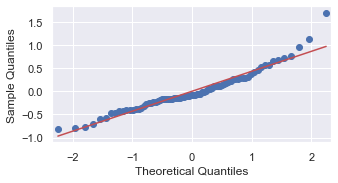

In [98]:
plt.hist(lm.resid)
plt.show()

qqplot(lm.resid, line="s")
plt.show()

In [99]:
_, p = stats.shapiro(lm.resid)
print( "p value is: ")
print(p)  
print("Not Normal") 

p value is: 
0.0016973366728052497
Not Normal
